In [1]:
##read data
trans = read.csv('transactions.csv', header=TRUE)
impress = read.csv('impressions.csv', header=TRUE)

In [6]:
##combine transaction and impression datasets together
cadence <-xtabs (~ date + channel , data = impress )
transbyday <-xtabs (~date , data = trans )

In [7]:
mdata <- as.data.frame(cbind(trans = transbyday[1:57],cadence[2:58,])) # aligining

#view data
head(mdata)


,trans,direct,display,email,social
,<int>,<int>,<int>,<int>,<int>
2017-01-01,325,0,3786,0,7481
2017-01-02,357,0,3792,0,7416
2017-01-03,589,0,3656,4798,7505
2017-01-04,479,0,3731,0,7648
2017-01-05,403,0,3770,0,7620
2017-01-06,498,4974,3611,0,7614


# Marketing Mix Modeling

A "marketing mix model" or "MMM" is a regression relating advertising spending or total impressions to some response such as "sales (transactions)". Marketing mix modeling (MMM) is also a statistical analysis utilizing marketing time series data to estimate the impact of various marketing strategies on sales and then predict the impact of future sets of marketing mix or tactics. It is often used to optimize advertising mix and promotional tactics with respect to sales revenue or profit.

In order to investigate the relationships or correlations between total sales (transactions) and impression factors (four different advertising channels - display ads, social media ads, email ads, and direct mail ads) within a specific time period, we implemented linear regression model for marketing mix modeling. By analyzing the correlations between marketing activities and the transactions, weakness and strengths of various channels, seasonality of consumer's response, the marketing team could evaluate the cost efficiency and thus move forward to optimize the resources allocation for marketing spending, and strategically plan marketing events to improve the effectiveness of marketing efforts.

A simple marketing mix model for our case could be represented as follows:
$$sales_t = \beta_0 + \beta_1direct_t + \beta_2display_t + \beta_3email_t + \beta_4social_t + \epsilon_t$$

the $\beta$'s represent the unknown relationship between advertising spending and sales. For instance, $\beta_1$ means the increase in sales we will gain for each additional display impression unit while holding other impression factors fixed.

* Exploration plots

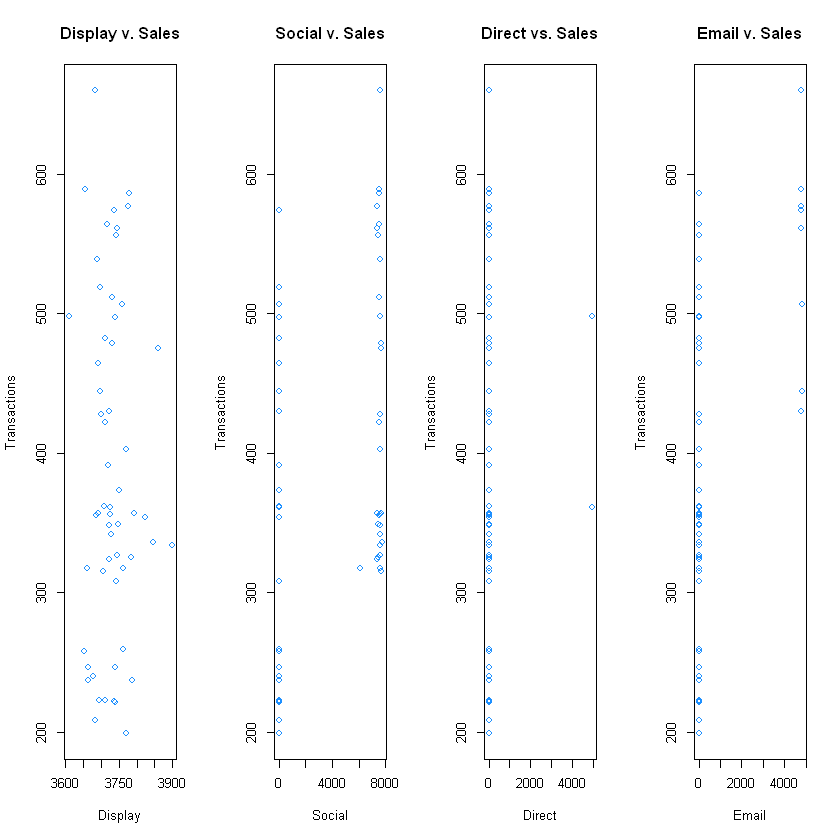

In [8]:
par(mfrow=c(1,4))
plot(x=mdata$display, y=mdata$trans, xlab="Display",
     ylab="Transactions", main="Display v. Sales",col="dodgerblue")
plot(x=mdata$social, y=mdata$trans, xlab="Social",
     ylab="Transactions", main="Social v. Sales",col="dodgerblue")
plot(x=mdata$direct, y=mdata$trans, xlab="Direct",
     ylab="Transactions", main="Direct vs. Sales",col="dodgerblue")
plot(x=mdata$email, y=mdata$trans, xlab="Email",
     ylab="Transactions", main="Email v. Sales",col="dodgerblue")

Those plots gave us a general idea about how's the relationship between impression factors and sales, the Display channel tends to show a different trend compared to others, which will be explored more in the following model building part.


In [9]:
res <- cor(mdata)
round(res, 3)

,trans,direct,display,email,social
trans,1.000,0.070,-0.028,0.529,0.395
direct,0.070,1.000,-0.235,-0.077,-0.007
display,-0.028,-0.235,1.000,-0.068,0.142
email,0.529,-0.077,-0.068,1.000,-0.025
social,0.395,-0.007,0.142,-0.025,1.000


Based on the correlation matrix, it can be easily found that Email, and Social seems to have a bigger impact on Sales compared with direct and display. They have positive correlations, which are 0.529, and 0.395, and the other two factors seem to have a slight impact.

We can have observations of the sales and other advertising data for different impression channels, which will give us the data to estimate these unknown parameters of the model, and the process will be shown below.

**Model 1: Basic regression relating transactions to impressions**

The model 1 can be written as
$$Sales_t=\beta_0 + \beta_1direct_t+\beta_2display_t+\beta_3 email_t+\beta_4social_t+\epsilon_t$$

In [10]:
model1 <- lm(trans ~ direct + display + email  + social , data = mdata)
summary (model1)


Call:
lm(formula = trans ~ direct + display + email + social, data = mdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-103.79  -64.91  -44.29   66.11  212.14 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 510.038308 928.122592   0.550 0.584989    
direct        0.014278   0.013765   1.037 0.304416    
display      -0.054943   0.248928  -0.221 0.826175    
email         0.039164   0.007354   5.325 2.18e-06 ***
social        0.013127   0.003278   4.005 0.000198 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 91.98 on 52 degrees of freedom
Multiple R-squared:  0.4603,	Adjusted R-squared:  0.4188 
F-statistic: 11.09 on 4 and 52 DF,  p-value: 1.406e-06


* From the above output, there are two statistically significant effects, which are social  and email impressions, and we gain 0.013 and 0.039 additional transactions for each impression.

* The estimated effect of Display is negative but not significant.

**Model 2: running the second model with time factor**

The model 2 can be written as
$$Sales_t=\beta_0 + \beta_1direct_t+\beta_2display_t+\beta_3 email_t+\beta_4social_t+\beta_5-_10dayofweek+\epsilon_t$$

In [13]:
#Day of week, in linear regression, since dayofweek is character variable with 7 levels,the output includes 6 levels (no Friday). 
mdata$dayofweek <- weekdays(as.Date(rownames(mdata)))
model2 <- lm(trans ~  direct + display + email +social + dayofweek, data = mdata)
summary(model2)


Call:
lm(formula = trans ~ direct + display + email + social + dayofweek, 
    data = mdata)

Residuals:
   Min     1Q Median     3Q    Max 
-87.09 -51.78 -21.70  25.46 221.46 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3.482e+02  8.919e+02   0.390 0.698063    
direct              2.954e-02  1.417e-02   2.085 0.042632 *  
display            -3.112e-02  2.391e-01  -0.130 0.896986    
email              -9.607e-01  1.463e+00  -0.656 0.514809    
social              1.275e-02  3.077e-03   4.144 0.000145 ***
dayofweekMonday     7.141e+01  4.562e+01   1.565 0.124357    
dayofweekSaturday   6.445e+01  4.560e+01   1.413 0.164318    
dayofweekSunday     5.529e+01  4.460e+01   1.240 0.221330    
dayofweekThursday   6.766e+01  4.534e+01   1.492 0.142440    
dayofweekTuesday    4.877e+03  7.030e+03   0.694 0.491313    
dayofweekWednesday  1.711e+02  4.534e+01   3.774 0.000459 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' 

**Model 3: running the third model with ad stock variable**
We usually use an exponential decay function to describe how the effect of the advertisements drops. Additionally, markets defined a term named advertising adstock, which describes the prolonged or lagged effect of advertising on consumer purchase behavior. It is also known as 'advertising carry-over'. Adstock is an important component of marketing-mix models. An ad stock variable is created by computing the exponential decay of the impressions on each day and then sum up the total stock from impressions on previous days.


In [15]:
# add Ad Stock variable over time for the different channels, the codes use an exponential decay function to describe how the effect of the ad falls off over time,the decay rate for each stock variable was specified based on intuition, so An ad stock variable is created by computing the exponential decay of the impressions on each day and then summing up the total "stock" from impressions on previous days.
#filter function was used to apply linear filtering to a univariate time series or to each series separately of a multivariate time series. Filter specifies the decay rate/filter coefficients in reverse time order. The method "recursive" means that an autoregression is used.

mdata$email.stock <- as.numeric(filter(x=mdata$email, filter =0.5, method ="recursive"))
mdata$display.stock <- as.numeric(filter(x=mdata$display, filter =0.3, method ="recursive"))
mdata$direct.stock <- as.numeric(filter(x=mdata$direct, filter =0.75, method ="recursive"))
mdata$social.stock <- as.numeric(filter(x=mdata$social, filter =0.3, method ="recursive"))

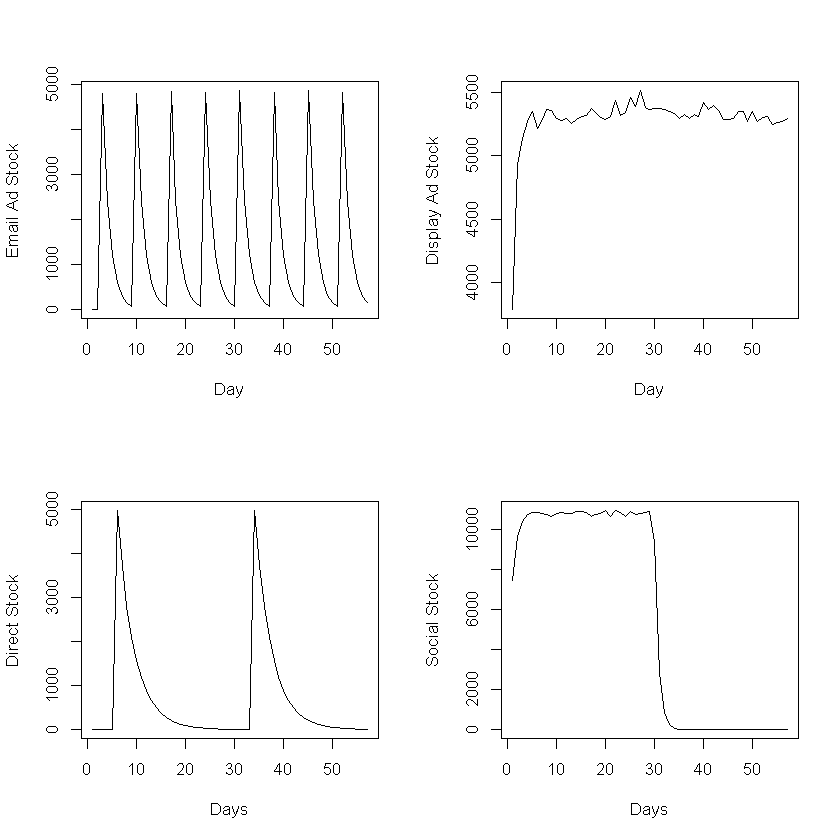

In [16]:
# Plot the Ad Stock variables over time for the different channels
par(mfrow=c(2,2))
plot(mdata$email.stock, type ="l", xlab ="Day", ylab ="Email Ad Stock")
plot(mdata$display.stock, type ="l", xlab ="Day", ylab ="Display Ad Stock")
plot(mdata$direct.stock, type ="l", xlab ="Days", ylab ="Direct Stock")
plot(mdata$social.stock, type ="l", xlab ="Days", ylab ="Social Stock")

The model 3 can be written as

$Sales_t=\beta_0 + \beta_1direct.ad.effect_t+\beta_2display.ad.effect_t+\beta_3 email.ad.effect_t+\beta_4social.ad.effect_t+\epsilon_t$

In order to make the results more precisely, we will remove first few observations to allow for the "Warmup" of the advertising effect based on the theory of advertising effect.

In [19]:
##run model with ad stock variables
model3 <- lm(trans~  direct.stock + display.stock +email.stock +social.stock, data = mdata[5:nrow(mdata),])
summary(model3)


Call:
lm(formula = trans ~ direct.stock + display.stock + email.stock + 
    social.stock, data = mdata[5:nrow(mdata), ])

Residuals:
     Min       1Q   Median       3Q      Max 
-170.442  -31.630   -3.793   19.411  125.000 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -4.605e+02  7.538e+02  -0.611    0.544    
direct.stock   5.557e-02  6.193e-03   8.974 7.75e-12 ***
display.stock  1.283e-01  1.414e-01   0.907    0.369    
email.stock    5.054e-02  4.814e-03  10.499 5.03e-14 ***
social.stock   9.468e-03  1.422e-03   6.659 2.45e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 54.17 on 48 degrees of freedom
Multiple R-squared:  0.8147,	Adjusted R-squared:  0.7992 
F-statistic: 52.74 on 4 and 48 DF,  p-value: < 2.2e-16


* Positive effects for all forms of advertising.

* Email and Direct appears to have a similar influence on sales.

* All effects are statistically significant except for Display. Display still has a high standard error after the adjustment of advertising effect and it indicates that we do not have a precise estimate of its effect. This happened because daily display impressions are pretty much the same every day. 


In our case, we assumed a decay rate for each channel when we created the advertising effect variables. We selected a small decay rate for display and social and a larger rate for email due to our intuition, which is reasonable as people normally have a short memory in display and social ads while having a slightly longer memory in email impressions.

**Model 4: running the fourth model with interaction terms**

The model 4 can be written as

$Sales_t=\beta_0 + \beta_1direct.ad.effect_t+\beta_2display.ad.effect_t+\beta_3 email.ad.effect_t+\beta_4social.ad.effect_t+\beta_5interaction+\epsilon_t$


In [20]:
##run model with ad stock variables and interaction term
model4 <-lm( trans ~ direct.stock + display.stock +email.stock +social.stock + direct.stock * display.stock, data = mdata[5:nrow(mdata),])
summary (model4)


Call:
lm(formula = trans ~ direct.stock + display.stock + email.stock + 
    social.stock + direct.stock * display.stock, data = mdata[5:nrow(mdata), 
    ])

Residuals:
     Min       1Q   Median       3Q      Max 
-206.914  -22.394   -1.517   23.371  130.328 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 3.287e+02  7.936e+02   0.414   0.6806    
direct.stock               -1.364e+00  6.001e-01  -2.273   0.0276 *  
display.stock              -2.121e-02  1.492e-01  -0.142   0.8876    
email.stock                 5.118e-02  4.607e-03  11.109 9.63e-15 ***
social.stock                1.040e-02  1.415e-03   7.354 2.38e-09 ***
direct.stock:display.stock  2.679e-04  1.133e-04   2.366   0.0222 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 51.75 on 47 degrees of freedom
Multiple R-squared:  0.8344,	Adjusted R-squared:  0.8168 
F-statistic: 47.35 on 5 and 47 DF,  p-value: < 2.2